# Data analysis exercise

## Vahid Mardanlou


Here I load the jsonl file. In the data, the "u" indicates that the types are unicode. 

In [2]:
import json

data = []
with open('ida_wrangling_exercise_data.2017-02-13.jsonl') as jsonfile:
    for line in jsonfile:
        data.append(json.loads(line))
        
# Check also json.dumps(json.loads(line))  >>> It gives string format
# Check also json.dumps(d)

I wanted to see how each line looks like.

In [3]:
data[1]

{u'address': u'20722 Coleman Villages\nEast Rose, SC 71064-5894',
 u'dob': u'1965-09-09',
 u'email': u'sperez@armstrong.com',
 u'id': u'876ff718291d4397bb1e0477ceee6ad9',
 u'name': {u'firstname': u'Tamara', u'lastname': u'Myers'},
 u'phone': u'1-594-462-7759',
 u'record_date': u'2009-03-28T20:22:57',
 u'ssn': u'xxx-xx-8025'}

In [4]:
type(data)

list

The values of each line could be string or dictionary.

In [5]:
data[1].values()

[{u'firstname': u'Tamara', u'lastname': u'Myers'},
 u'1965-09-09',
 u'sperez@armstrong.com',
 u'1-594-462-7759',
 u'xxx-xx-8025',
 u'2009-03-28T20:22:57',
 u'20722 Coleman Villages\nEast Rose, SC 71064-5894',
 u'876ff718291d4397bb1e0477ceee6ad9']

In [6]:
data[1]['name'].keys()

[u'lastname', u'firstname']

Getting the keys for one of the data sets.

In [7]:
data[1].keys()

[u'name',
 u'dob',
 u'email',
 u'phone',
 u'ssn',
 u'record_date',
 u'address',
 u'id']

In [8]:
type(data[1][u'id'])  # unicode doesn't have keys

unicode

The total number of lines are as follow,

In [9]:
len(data)

150000

# Question 1 and 2

I defined the "printkeys" function in which it is a recursive function and try finding dictionaries as values of the keys of previous dictionary. 

In [14]:
def printkeys(Dictionary,Root,List_new):
    if type(Dictionary) == type(dict()):
        A_keys = Dictionary.keys()
        for k in A_keys:
            if Root != '':
                printkeys(Dictionary[k],str(Root + '.' + k),List_new)  
            else:
                printkeys(Dictionary[k],str(k),List_new)  
    else:
        # print Root
        return List_new.append(Root)


I used the above function to find the fields for each lines of data.

In [15]:
List_new =[]
for line in data:
    printkeys(line,'',List_new)

Using the collections module, i imported the Counter command to find the distinct elements along the number of repetitions for each of them. The following code gives the fields and the corresponding frequency. It will be saved in a dictionary format.

In [16]:
from collections import Counter
count_field = Counter(List_new)
count_field

Counter({'address': 75193,
         'address.city': 61233,
         'address.state': 61233,
         'address.street': 61233,
         'address.zip': 61233,
         'dob': 143874,
         'email': 130880,
         'id': 150000,
         'name': 43058,
         'name.firstname': 105004,
         'name.lastname': 105004,
         'name.middlename': 43669,
         'phone': 140261,
         'record_date': 150000,
         'ssn': 142444})

In [17]:
Total = len(data)

As in Question 2, it is asked to be in percentage format, so the following code will give the frequency in percentage format.

In [18]:
percentage_dict = {}
ind = 0
for i in Counter(List_new).values():
    percentage_dict.update({count_field.keys()[ind]:round((int(i)*100.0/Total),2)})
    ind += 1

In [19]:
percentage_dict

{'address': 50.13,
 'address.city': 40.82,
 'address.state': 40.82,
 'address.street': 40.82,
 'address.zip': 40.82,
 'dob': 95.92,
 'email': 87.25,
 'id': 100.0,
 'name': 28.71,
 'name.firstname': 70.0,
 'name.lastname': 70.0,
 'name.middlename': 29.11,
 'phone': 93.51,
 'record_date': 100.0,
 'ssn': 94.96}

It is good to visualize the above numbers in the bar plot form.

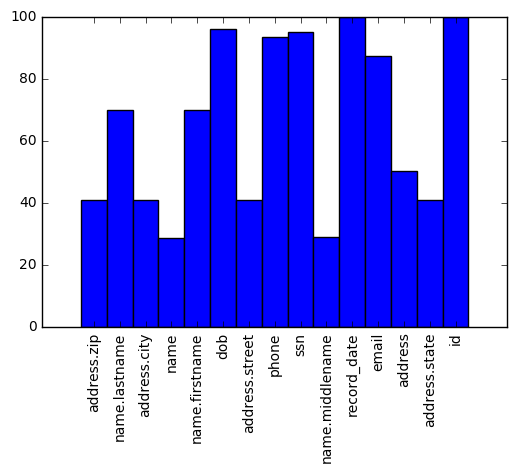

In [20]:
import matplotlib.pyplot as plt

plt.bar(range(len(percentage_dict)), percentage_dict.values(),width=1, align='center')
plt.xticks(range(len(percentage_dict)), list(percentage_dict.keys()),rotation='vertical')

plt.show()

Here is the top 5 fileds that I am asked in question 2, part (b).

In [21]:
sorted(percentage_dict, key=percentage_dict.get, reverse=True)[:5]

['record_date', 'id', 'dob', 'ssn', 'phone']

# Question 3

In this question, I just consider the fields which has first name. So, the name field checked to be in dictionary format. Then, I extract the first name. If I had more time, I would like to look at the fileds which the first/last/middle name are mixed. The problem in this case is, the first name could be also a last name. "Ben" could be first name or middle name or even last name.

In [22]:
List_name = []
for line in data:
    if 'name' in line.keys():
            if type(line['name']) != unicode:
                List_name.append(line["name"]["firstname"])
count_firstnames = Counter(List_name)
count_firstnames;

Here is the number of distinct first names.

In [23]:
len(count_firstnames.keys())

690

# Question 4
We need to be clear about the street name. Here are the two options:
> Street name is seperated in address field (address.street)

> Street is a unicode and not a dictionary

The problem with the first one is, the building number is included in street name. And with the second one, I need to exclude the suite or Apt number from the address. I also checked the US Post website to see other suffixes in the address and I got the followings,

Suite, building, Apt, APARTMENT, FLOOR, UNIT, ROOM, DEPARTMENT.


In [24]:
data[4]["address"]['street']

u'158 Smith Vista'

Some address's as the following are not clear about the street name. data[1567] and data[100004] are military bases. Based on my experience usually these bases don't have street name and just end up with a post box. For these cases, my code doesn't not show any street name. It calculates the number of them and all the coressponding indices are stored in a list. The future work here, it could be to aggregate some data to recognize if any street name provided with them (As these data are fake so this is for real data scenarios)

In [25]:
data[1567]

{u'address': u'PSC 9231, Box 1622\nAPO AE 32085-8133',
 u'dob': u'1958-09-27',
 u'id': u'1dd0d8ae204441a9b3b31c109a5e6bc7',
 u'name': {u'firstname': u'Paul', u'lastname': u'Adams'},
 u'phone': u'115.018.8489x9398',
 u'record_date': u'2006-05-11T00:47:34',
 u'ssn': u'xxx-xx-0915'}

In [26]:
data[100004]

{u'address': u'USNS Larson\nFPO AE 97404-8315',
 u'dob': u'1993-09-06',
 u'email': u'melissa73@daniel.biz',
 u'id': u'e9b35bcaa6694916a7728c1f2fd9d1f6',
 u'name': u'Cheryl Miller',
 u'phone': u'1-356-210-2232x944',
 u'record_date': u'2009-12-13T19:40:11',
 u'ssn': u'xxx-xx-0154'}

Also, in same cases such as data[1569] the street filed is "61541 Walker Junctions". I assumed the street name is "Walker Junctions" as I am not sure if "Junctions" is a common suffix to use in the address or not.

In [27]:
data[1569]

{u'address': {u'city': u'Mirandafort',
  u'state': u'TN',
  u'street': u'61541 Walker Junctions',
  u'zip': u'66309'},
 u'dob': u'1970-06-23',
 u'email': u'ramirezcameron@gmail.com',
 u'id': u'e341ab6cc9dd4356b1f2533ae5935e27',
 u'name': {u'firstname': u'Angela', u'lastname': u'Odom'},
 u'phone': u'(983)309-7972',
 u'record_date': u'2015-11-25T18:31:52',
 u'ssn': u'xxx-xx-6781'}

In the following, I used "re" module to find the patterns. The for loop goes over the lines. I defined 3 different flags.

> flag 0: (The default) It means the pattern of the address in this line was not captured by the code. This is a sanity check to make sure code works fine.

> flag 1: It means the pattern is captured.

> flag 2: If the line doesn't have address field.

> flag 3: the address belongs to the military base(Expalined before).

Then we have two group of lines. The ones where the "address.street" is defined and the ones with just "address" field. Actually, for both cases the address string is splited to look for APO/FPO/DPO strings (military structures). In a case of not observing the aformentioned strings, it will be one of the forms,

> '\d+ (.+\s?) [!Suite|building|Apt|APARTMENT|FLOOR|UNIT|ROOM|DEPARTMENT|\n]'

> '\d+ (.+\s?)'

The first one is looking for any combinations where the builiding number is followed by some words. And it should be stopped when it reaches some suffixes in the address (Suite, ...) (These suffixes can be found in USPS website)

In the latter pattern, as the suffix words are not observed, then it chooses just words after a sting of numbers.

By having more time, I could think of a more efficent code and also consider the cases where "Parkway", "Junction", ... appears in the street name. 


In [28]:
import re

List_Street = []
unsuccessful_address = []
military_address = []
suffix_list = ['Suite' , 'building' , 'Apt.' , 'APARTMENT' , 'FLOOR' , 'UNIT', 'ROOM', 'DEPARTMENT']
counter = 0


for line in data:
    flag = 0
    if 'address' in line.keys():
            if type(line['address']) != unicode:
                str1 = line["address"]["street"]
                b = str1.split()
                if ('FPO' not in b) and ('APO' not in b) and ('DPO' not in b):   # Military bases
                    if any(i in b for i in suffix_list):
                        m = re.search('\d+ (.+\s?) [!Suite|building|Apt|APARTMENT|FLOOR|UNIT|ROOM|DEPARTMENT|\n]', str1)
                        flag = 1
                    else:
                        m = re.search('\d+ (.+\s?)', str1) 
                        flag = 1
                else:
                    flag = 3
            else:
                str1 = line["address"]
                mstr = str(str1)
                b = mstr.split()
                if ('FPO' not in b) and ('APO' not in b) and ('DPO' not in b):
                    str2 = str1.splitlines()[0]
                    b = str2.split()
                    if any(i in b for i in suffix_list):
                        m = re.search('\d+ (.+\s?) [!Suite|building|Apt|APARTMENT|FLOOR|UNIT|ROOM|DEPARTMENT|\n]', str2)
                        flag = 1
                    else:
                        m = re.search('\d+ (.+\s?)', str2)
                        flag = 1
                else:
                    flag = 3
    else:
        flag = 2
    if flag == 1:
        Street_name = m.group(1)
        List_Street.append(Street_name)
    elif flag == 0:
        unsuccessful_address.append(counter)
    elif flag == 3:
        military_address.append(counter)
    counter += 1
    

The total number of distinct street names are as below.

In [29]:
count_streetname = Counter(List_Street)
len(count_streetname)

79999

In [30]:
List_Street;

The following command shows the number of military bases' addresses that appeared in data. If I had more time, I would like to sepearate the ones that might be a street name in it.

In [31]:
len(military_address)

8050

# Question 5

In [32]:
data[100202]

{u'address': {u'city': u'North Melissachester',
  u'state': u'HI',
  u'street': u'51125 Tyler Fork Suite 810',
  u'zip': u'02722'},
 u'email': u'ann78@gmail.com',
 u'id': u'4a23cf00ab5d4e98ae28334ac0ed2669',
 u'name': {u'firstname': u'Beth', u'lastname': u'May'},
 u'phone': u'177-175-7202',
 u'record_date': u'2012-10-21T19:16:12',
 u'ssn': u'xxx-xx-4341'}

In [33]:
str2 = data[100202]['phone']
str2

u'177-175-7202'

Different patterns in phone number:

>  

> 888 888 8888

> 888.888.8888

> (888) 888-8888

> 1-888-888-8888

> 888-888-8888-8888

> 888-888-8888x8888

> 888-888-8888 ext. 8888

The following is my approach. The phone patterns could be any form as above. So, I am dealing with a combination of 3 by 3 by 4 number. By knowing the particular length of the corresponding string, the pattern is '(\d{3})\D*(\d{3})\D*(\d{4})\D*(\d*)$' . 

> First (\d{3}) is for the area code

> \D* between digits could be anything except numbers (\D). And having (*) shows it could be any size.

> The second set of digits (\d{3}) and the last one is (\d{4}). 

> The extention code is considered in (\d*). As we consider (*) it could be zero or non-zero amount of digits.

In [34]:
import re

List_AreaCode = []

for line in data:
    if 'phone' in line.keys():
        str1 = line["phone"]
        m = re.search(r'(\d{3})\D*(\d{3})\D*(\d{4})\D*(\d*)$', str1) 
        area_id = m.group(1)
        List_AreaCode.append(area_id)
        
count_firstnames = Counter(List_AreaCode)       

In [35]:
count_firstnames;

Here are the top 5 area codes,

In [36]:
sorted(count_firstnames, key=count_firstnames.get, reverse=True)[:5]

[u'002', u'022', u'019', u'054', u'062']